# Shopping Customer Segmentation

Problem Statement: To understand the Target Customers for the marketing team to plan a strategy.

Customer segmentation is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

### Importing libraries

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### Load the dataset

In [177]:
df = pd.read_csv("Mall_Customers.csv")

In [178]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This dataset has 5 columns, 200 rows, 0 duplicated rows, and 0 missing values.(Results From EDA)

Clustering is a type of unsupervised machine learning in which the algorithm processes our data and divided them into “clusters”.

### Label Encoding

In [179]:
le=LabelEncoder()

df['Gender']=le.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### K-Means Clustering

K-Means clustering is an unsupervised machine learning algorithm that divides the given data into the given number of clusters. Here, the “K” is the given number of predefined clusters, that need to be created.

It is a centroid based algorithm in which each cluster is associated with a centroid. The main idea is to reduce the distance between the data points and their respective cluster centroid.

# Clustering: Univariate

In [180]:
df_new=df[["Annual Income (k$)"]]

df_new.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


#### Within Cluster Sum of Squared Errors (WSS) 

In [181]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df_new)
    wcss.append(km.inertia_)

### The elbow curve

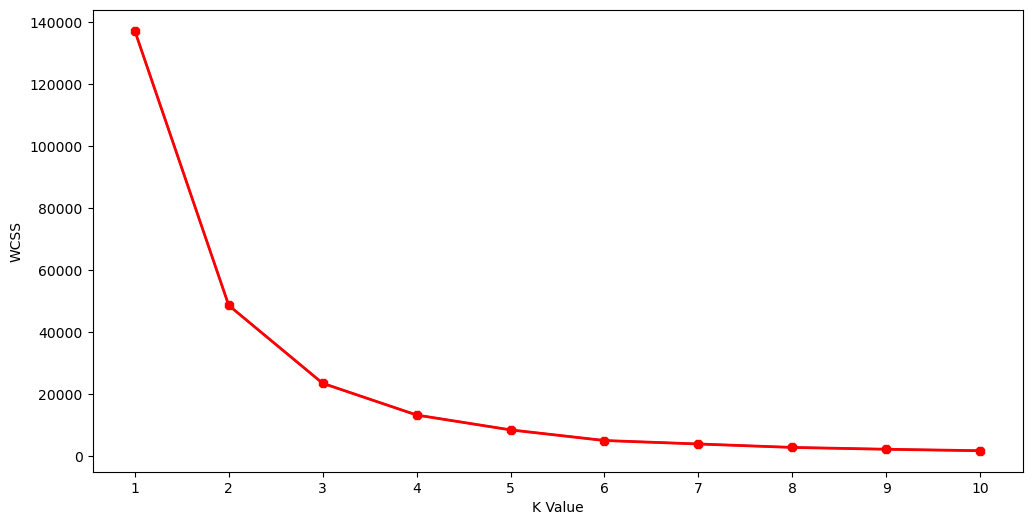

In [182]:

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

The x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 4 the drop is minimal, so 4 to be the number of clusters.

In [183]:
#Taking 4 clusters
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(df_new)
#predicting the labels of the input data
y=km1.predict(df_new)
#adding the labels 
df["Income Cluster"] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [184]:
df['Income Cluster'].value_counts()

1    68
3    62
0    50
2    20
Name: Income Cluster, dtype: int64

In [185]:
km1.inertia_

13278.112713472483

In [186]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,35.280000,27.400000,49.480000
1,43.970588,54.764706,50.014706
2,36.600000,109.700000,52.000000
3,36.838710,77.806452,50.403226


# Clustering based on 2 features

### Spending Score & Annual Income

In [187]:
df1=df[["CustomerID","Age","Annual Income (k$)","Spending Score (1-100)"]]

In [188]:
scaler = StandardScaler()

In [189]:
scaler.fit(df1[['Annual Income (k$)']])
df1['Annual Income (k$)']=scaler.transform(df1[['Annual Income (k$)']])

In [190]:
scaler.fit(df1[['Spending Score (1-100)']])
df1['Spending Score (1-100)']=scaler.transform(df1[['Spending Score (1-100)']])
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,-1.738999,-0.434801
1,2,21,-1.738999,1.195704
2,3,20,-1.700830,-1.715913
3,4,23,-1.700830,1.040418
4,5,31,-1.662660,-0.395980


In [191]:
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


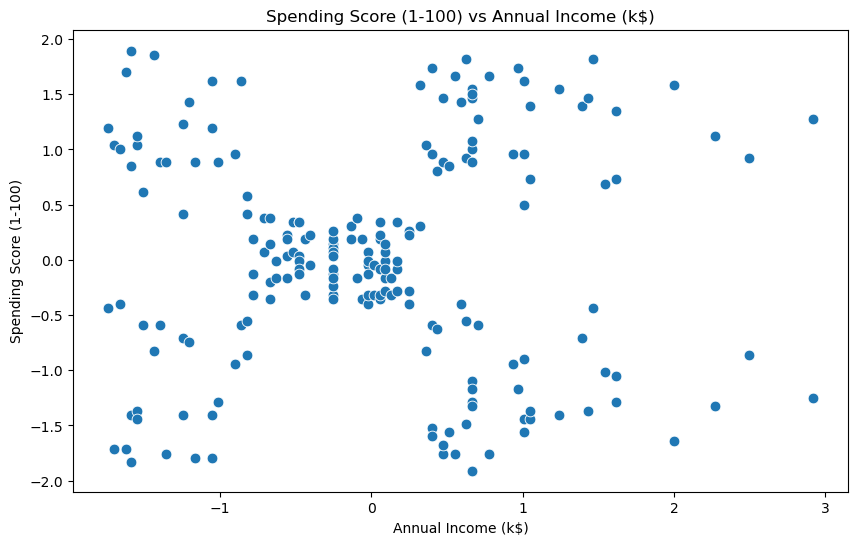

In [192]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

The data does seem to hold some patterns.

#### Within Cluster Sum of Squared Errors (WSS) 

In [193]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)


### The elbow curve

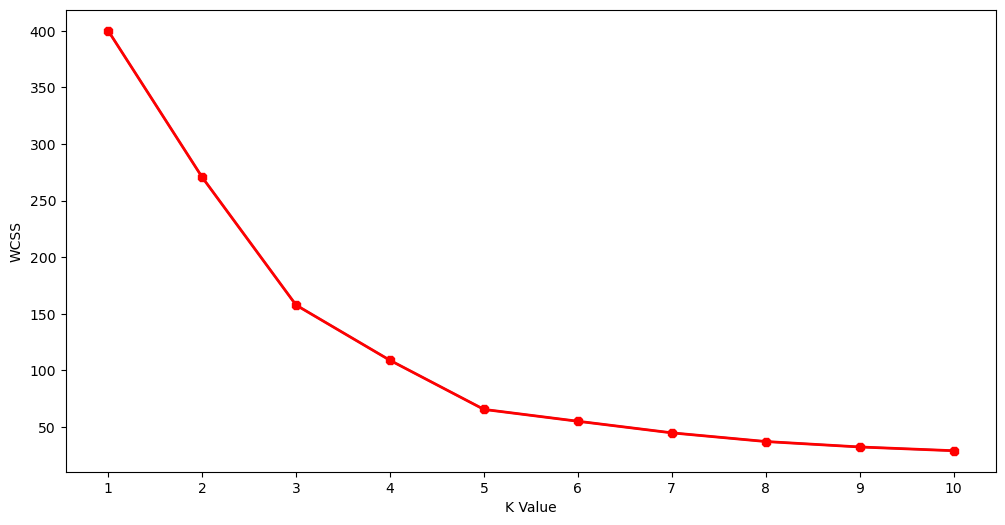

In [194]:

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

The x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so  5 to be the number of clusters.

In [195]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
X["Spending and Income Cluster"] = y
df["Spending and Income Cluster"] = y

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,4
1,2,1,21,15,81,0,3
2,3,0,20,16,6,0,4
3,4,0,23,16,77,0,3
4,5,0,31,17,40,0,4


In [196]:
centers =pd.DataFrame(km1.cluster_centers_)
centers.columns = ['x','y']

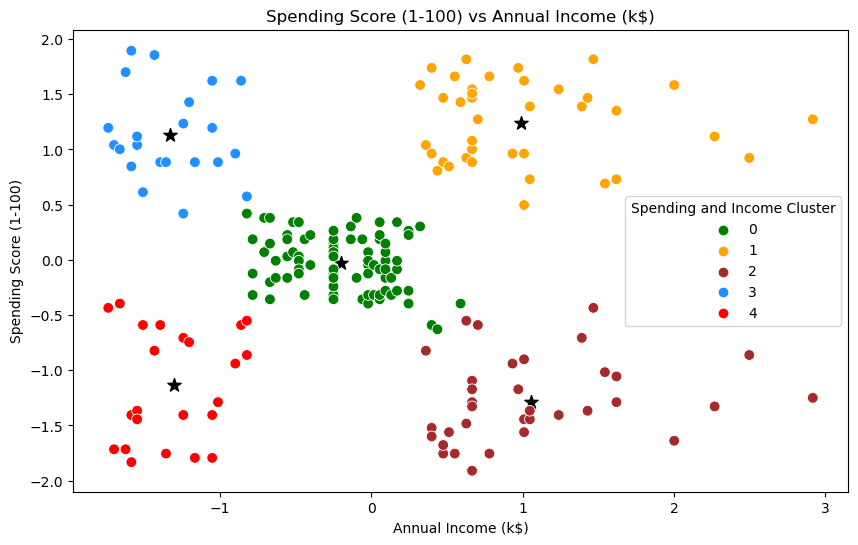

In [197]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Spending and Income Cluster",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [198]:
#Interpretation 
#Cluster 1 (Green  Color) -> earning less but spending more
#cluster 2 ( Yellow color) -> earning high and also spending high [TARGET SET]
#cluster 3 (Brown  Color) -> earning high but spending less
#cluster 4 (cyan Color) ->  verage in terms of earning and spending 
#Cluster 5 (red Color) ->  Earning less , spending less

#here we can set the target set as Cluster 2 to predict which customers has earn more money and spending high.

5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score.



In [199]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [200]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


### Spending Score & Age

In [201]:
scaler.fit(df1[['Age']])
df1['Age']=scaler.transform(df1[['Age']])

In [202]:

X=df1[["Age","Spending Score (1-100)"]]

X.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


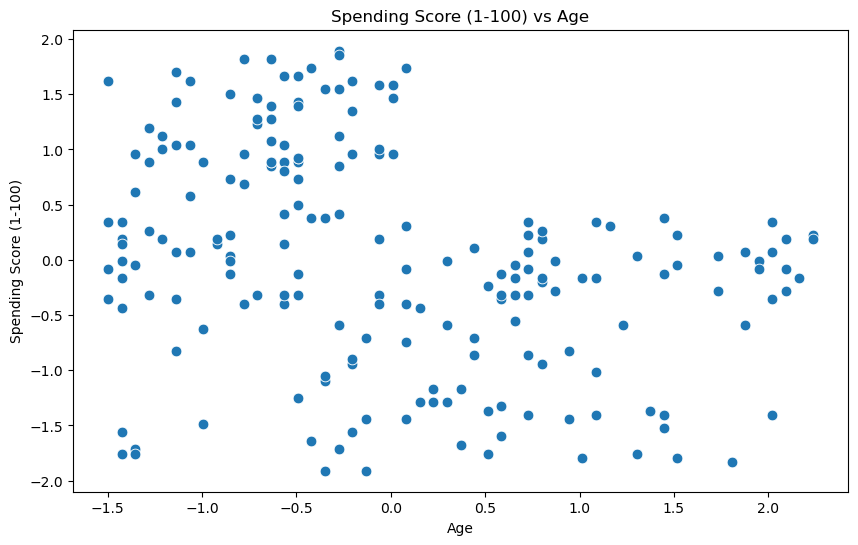

In [203]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Age')
plt.show()

#### Within Cluster Sum of Squared Errors (WSS) 

In [204]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)


### The elbow curve

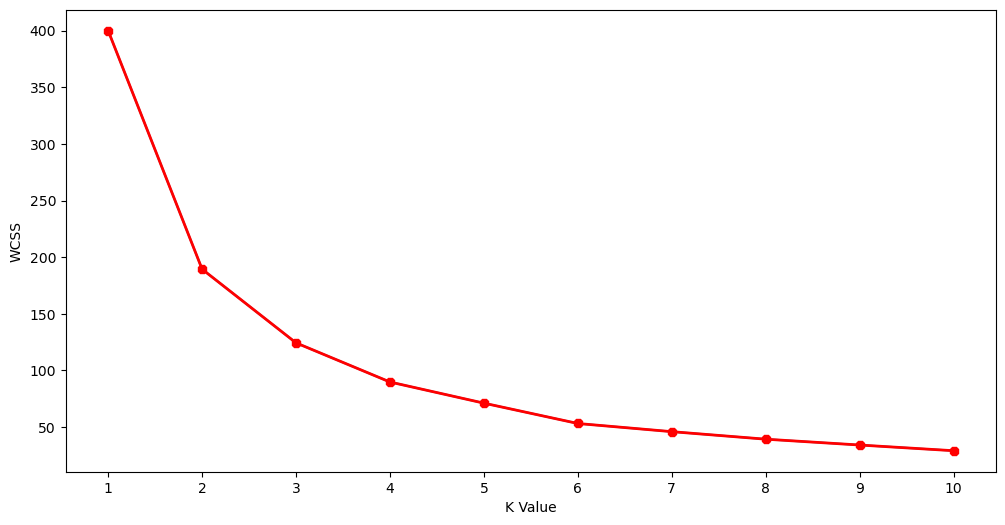

In [205]:

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

The x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so  5 to be the number of clusters.

In [206]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)

df["Spending and Age Cluster"] = y
X["Spending and Age Cluster"] = y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Spending and Age Cluster
0,1,1,19,15,39,0,4,4
1,2,1,21,15,81,0,3,0
2,3,0,20,16,6,0,4,2
3,4,0,23,16,77,0,3,0
4,5,0,31,17,40,0,4,4


In [207]:
centers =pd.DataFrame(km1.cluster_centers_)
centers.columns = ['x','y']

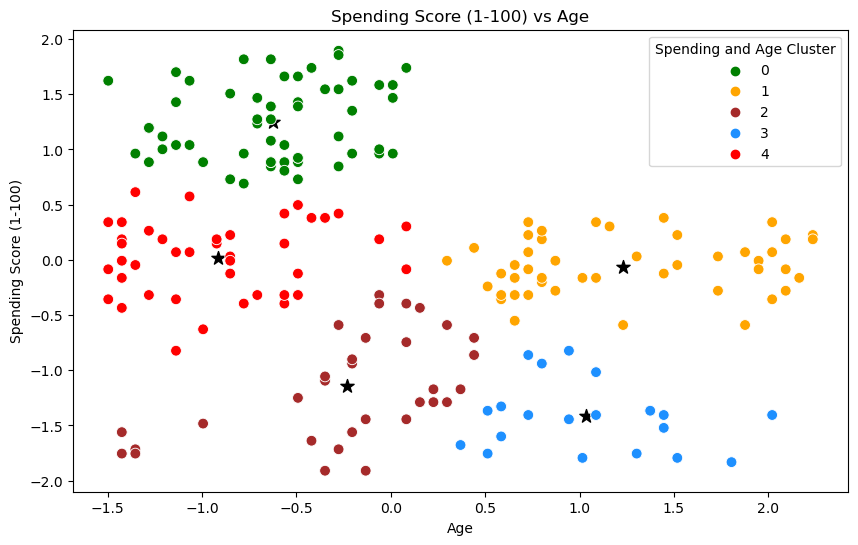

In [208]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue="Spending and Age Cluster",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = X  ,s = 60 )
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Age')
plt.show()

In [209]:
#Interpretation 
#Cluster 1 (Green Color) -> minimum in terms of age but spending score high [Target Set]
#cluster 2 (Yellow Color) -> maximum in terms of age and spending score less
#cluster 3 (Brown Color) -> average in terms of age and spending score less
#cluster 4 (Blue Color) -> maximum in terms of age and spending score average 
#Cluster 5 (Orange Color) -> minimum age and spending score average

#here we can set the target set as Cluster 1 to predict which age group is spending high

5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score.



In [210]:
pd.crosstab(df['Spending and Age Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Age Cluster,,
0,0.578947,0.421053
1,0.553191,0.446809
2,0.545455,0.454545
3,0.500000,0.500000
4,0.585366,0.414634


In [211]:
df.groupby('Spending and Age Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Age Cluster,,,
0,30.175439,66.070175,82.350877
1,55.978723,54.425532,48.510638
2,35.636364,69.969697,20.787879
3,53.272727,59.545455,13.681818
4,26.121951,52.902439,50.707317


## Mulivariate clustering 

In [212]:
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]

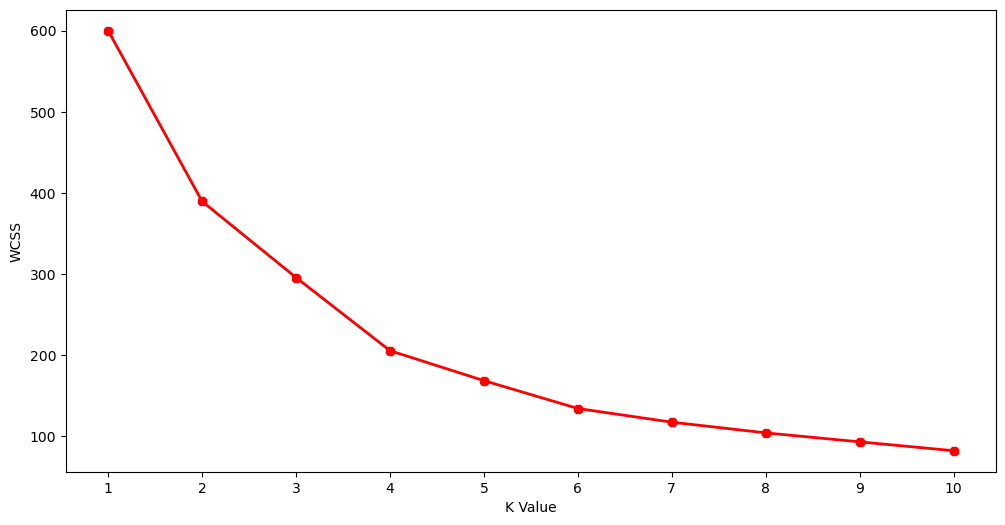

In [213]:

# calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

 K=5 will be a good value.

## Silhouette Score

## KMeans, Hierarchical Clustering, and GMMs’ Silhouette scores in different Ks

         KM        HC      GMMs   k
0  0.335472  0.317957  0.177182   2
1  0.357793  0.321489  0.338292   3
2  0.403958  0.361451  0.321359   4
3  0.416643  0.390028  0.402487   5
4  0.426855  0.420117  0.373963   6
5  0.417232  0.398295  0.406490   7
6  0.407228  0.366479  0.389038   8
7  0.421671  0.375385  0.405164   9
8  0.402931  0.380889  0.405465  10


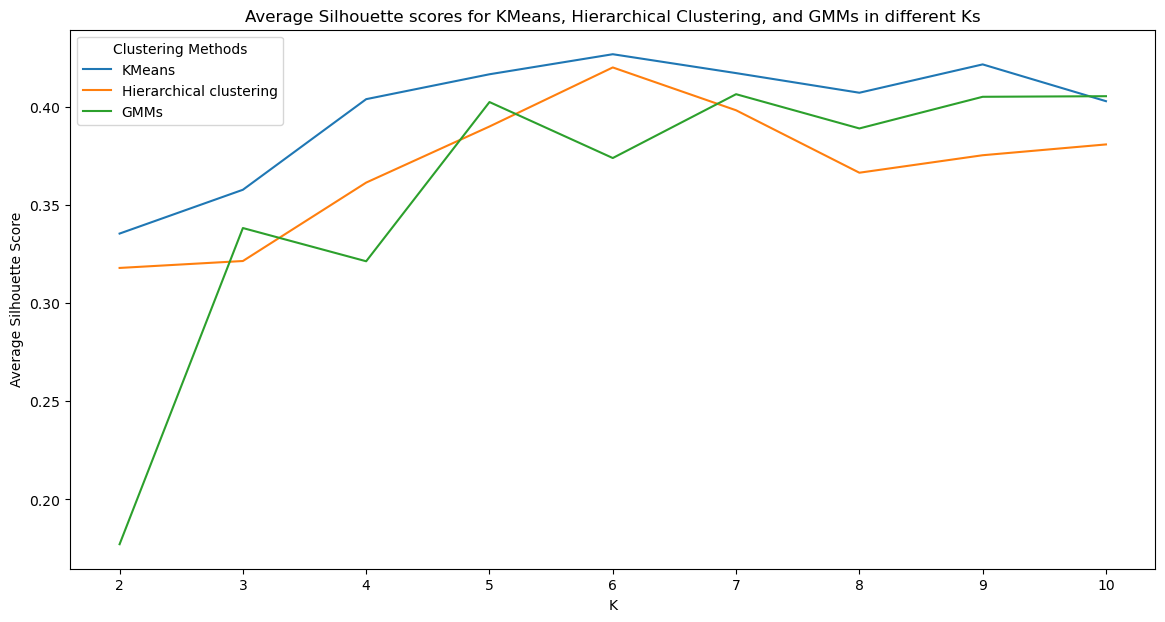

In [216]:
def plot_km_hc_gmms_in_different_ks(df_std, start_k, end_k):
    from sklearn.cluster import KMeans, AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    avg_silhouette_scores = []

    for k in range(start_k, end_k + 1):
        # Run the KMeans algorithm
        km = KMeans(n_clusters=k)
        km_labels = km.fit_predict(df_std)

        # Run the Hierarchical clustering algorithm
        hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(df_std)
        hc_labels = hc.labels_

        # Run the GMMs algorithm
        gm = GaussianMixture(covariance_type="spherical", n_components=k, random_state=0).fit(df_std)
        gm_labels = gm.predict(df_std)

        # Calculate average silhouette scores
        km_silhouette_vals = silhouette_samples(df_std, km_labels)
        hc_silhouette_vals = silhouette_samples(df_std, hc_labels)
        gm_silhouette_vals = silhouette_samples(df_std, gm_labels)
        km_avg_score = np.mean(km_silhouette_vals)
        hc_avg_score = np.mean(hc_silhouette_vals)
        gm_avg_score = np.mean(gm_silhouette_vals)
        avg_silhouette_scores.append([km_avg_score, hc_avg_score, gm_avg_score])

    df_avg_silhouette_scores = pd.DataFrame(avg_silhouette_scores, columns=['KM', 'HC', "GMMs"])
    df_avg_silhouette_scores["k"] = range(start_k, end_k + 1)
    print(df_avg_silhouette_scores)

    # Plot silhouette scores for different clustering methods
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title('Average Silhouette scores for KMeans, Hierarchical Clustering, and GMMs in different Ks')
    ax.plot('k', 'KM', data=df_avg_silhouette_scores)
    ax.plot('k', 'HC', data=df_avg_silhouette_scores)
    ax.plot('k', 'GMMs', data=df_avg_silhouette_scores)
    ax.legend(['KMeans', "Hierarchical clustering", "GMMs"], title="Clustering Methods")
    ax.set_xlabel('K')
    ax.set_ylabel("Average Silhouette Score")
    plt.show()

# Call the function with appropriate arguments
plot_km_hc_gmms_in_different_ks(df_std=X2, start_k=2, end_k=10)


The higher the number, the better the k is.

KMeans performs best when k=6 and scores 0.4268
Hierarchical clustering performs best when k=6 and scores 0.4201
GMMs performs best when k=7 and score 0.406490

## Conclusion of model choosing: KMeans with k =7

In [217]:
km2 = KMeans(n_clusters=6)
y2 = km2.fit_predict(X2)
df["Spending,Income And Age Cluster"] = y2
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Spending and Age Cluster,"Spending,Income And Age Cluster"
0,1,1,19,15,39,0,4,4,2
1,2,1,21,15,81,0,3,0,2
2,3,0,20,16,6,0,4,2,3
3,4,0,23,16,77,0,3,0,2
4,5,0,31,17,40,0,4,4,3


In [218]:
df = df.rename(columns={"Spending,Income And Age Cluster": "label"})


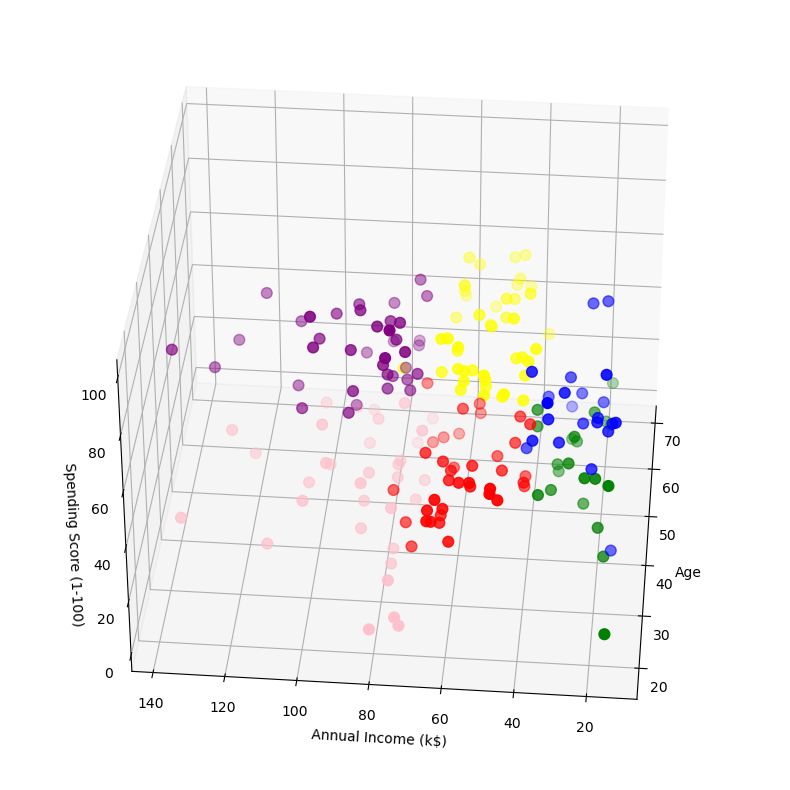

In [219]:
#3D Plot 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='purple', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='blue', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='green', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='yellow', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='pink', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


#### To get the customer IDs,

In [220]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")
cust6=df[df["label"]==5]
print('Number of customer in 5th group=', len(cust6))
print('They are -', cust6["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 38
They are - [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]
--------------------------------------------
Number of customer in 2nd group= 23
They are - [ 1  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 4th group= 21
They are - [ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 43 45]
--------------------------------------------
Number of customer in 5th group= 45
They are - [ 41  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73
  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102

## Mean Age , Mean Score and Median of Income

In [221]:

result = df.groupby('label').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'median',
    'Spending Score (1-100)': 'mean'
}).reset_index()

display(result)

,label,Age,Annual Income (k$),Spending Score (1-100)
0,0,32.692308,79.0,82.128205
1,1,27.000000,59.5,49.131579
2,2,25.000000,24.0,77.608696
3,3,45.523810,25.0,19.380952
4,4,56.333333,54.0,49.066667
5,5,41.264706,85.5,16.764706


In [222]:
#Inferences
#Cluster0->High Income, less spending score, middle age
#Cluster1->Average Income, Average spending score, old age
#Cluster2->Average Income, Average spending score, Young age
#Cluster3->High Income, High spending score, middle age
#Cluster4->low Income, low spending score, old age
#Cluster5->Low Income, High spending score, Young age

In [223]:
#Based on the segmentation severalgrowth tactics can be adop  to increase customer lifetime value and profit margin..